In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_pickle('foody_data.pkl')

In [3]:
data.head()

,time,user_name,user_link,brand_name,brand_link,review_content,review_link,avg_score,location_point,space_point,quality_point,service_point,price_point
0,14/9/2017 11:45,Sunny,https://www.foody.vn/thanh-vien/taiyo,El Sol - Meat & Wine - Võ Thị Sáu,https://www.foody.vn/ho-chi-minh/el-sol-meat-w...,Quán steak hiếm hoi mà mình cực kì ưng ý từ lâ...,https://www.foody.vn/ho-chi-minh/el-sol-meat-w...,8.6,7.0,10,9,9,8.0
1,14/9/2017 11:39,Nguyên Khánh,https://www.foody.vn/thanh-vien/viola_0309_tv,Busan Korean Food - Món Hàn Quốc - Đinh Tiên H...,https://www.foody.vn/ho-chi-minh/busan-korean-...,Vị trí dễ tìm. Giữ xe rất nhiệt tình. Dắt xe v...,https://www.foody.vn/ho-chi-minh/busan-korean-...,7.4,8.0,8,6,7,8.0
2,14/9/2017 11:34,Tú Hảo,https://www.foody.vn/thanh-vien/tuhao2509,TocoToco Bubble Tea - Cộng Hòa,https://www.foody.vn/ho-chi-minh/tocotoco-bubb...,"Địa điểm quán dễ tìm. Không gian cũng rộng, có...",https://www.foody.vn/ho-chi-minh/tocotoco-bubb...,6.4,7.0,8,7,7,3.0
3,14/9/2017 11:29,Vy Nhật,https://www.foody.vn/thanh-vien/zip_zilip,Le Castella Viet Nam - Bánh Bông Lan Đài Loan ...,https://www.foody.vn/ho-chi-minh/le-castella-v...,Thấy bánh này đang hot rần rần mình cũng gọi t...,https://www.foody.vn/ho-chi-minh/le-castella-v...,7.2,7.0,6,9,6,8.0
4,14/9/2017 11:26,Tien97,https://www.foody.vn/thanh-vien/tien97,Tabletop - Boardgame & Coffee,https://www.foody.vn/ho-chi-minh/tabletop-boar...,Mỗi lần nghĩ tới boardgame thì sẽ nghĩ tới vô ...,https://www.foody.vn/ho-chi-minh/tabletop-boar...,10.0,10.0,10,10,10,10.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174437 entries, 0 to 204388
Data columns (total 13 columns):
time              174437 non-null object
user_name         174437 non-null object
user_link         174437 non-null object
brand_name        174437 non-null object
brand_link        174437 non-null object
review_content    174437 non-null object
review_link       174437 non-null object
avg_score         174437 non-null float64
location_point    174436 non-null float64
space_point       174437 non-null int64
quality_point     174437 non-null int64
service_point     174437 non-null int64
price_point       174436 non-null float64
dtypes: float64(3), int64(3), object(7)
memory usage: 18.6+ MB


In [5]:
data.fillna(0, inplace=True)

In [6]:
data['userid'] = data.user_link.str.replace('https://www.foody.vn/thanh-vien/','')
data['brandid'] = data.brand_link.apply(lambda s: str(s).split('/')[-1])
data['city'] = data.brand_link.apply(lambda s: str(s).split('/')[-2])

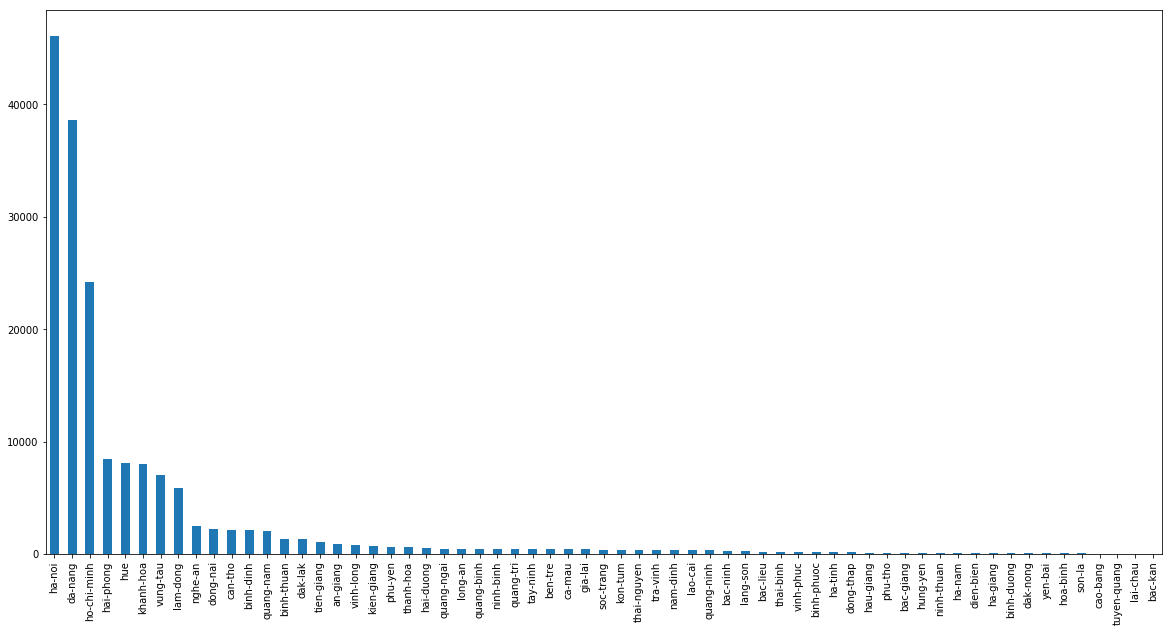

In [7]:
plt.figure(figsize=(20,10))
data['city'].value_counts().plot(kind='bar') 

In [8]:
len(data['brand_name'].unique())

14165

In [9]:
len(data['brandid'].unique())

14169

In [10]:
len(data['userid'].unique())

41232

In [11]:
num_reviews = pd.DataFrame(data['userid'].value_counts()).reset_index()
num_reviews.columns = ['userid','totalreviews']

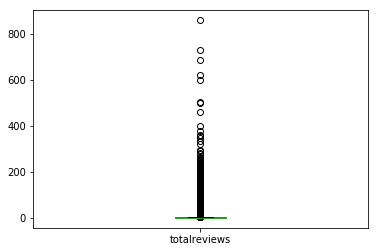

In [12]:
num_reviews['totalreviews'].plot(kind='box')

In [13]:
num_reviews.quantile([.8, .9, .99, .999])

,totalreviews
0.800,3.000
0.900,7.000
0.990,56.000
0.999,209.769


In [14]:
num_reviews[num_reviews['totalreviews']>209]['userid'].tolist()

['pinklyhilton',
 'giang.nguyen050',
 'windynguyen11995',
 'd4uch4mh3t_ch0m0tcu0ctjnh',
 'thuytien140797',
 'hoa.daquy.965',
 'think_of_you_g9x',
 'ngocdiepps',
 'ngan.ly',
 'nguyenanhnha1408',
 'nhhdvh97',
 'ronswift',
 'ngocdieu872003',
 'nhen0702',
 'lubchngc',
 'kunloveluv',
 'teababe024488',
 'namkhanhkt2510',
 'lydinh1188',
 'damtuan91091',
 'ohrainyday',
 'chimie102',
 'foodee_d8ytaswe',
 'tupham.dng',
 'nguyenkulan',
 'nam.tn.9999',
 'nhannhi',
 'vitiennguyen187',
 'saobang2211',
 'halana133',
 'khanhtramphan0509',
 'nguyenduyen.1143',
 'huyen.nguyen2993',
 'phangiaile',
 'thuthaonguyen0908',
 'nhan.nguyen8681',
 'tiendung.nguyen.35',
 'trangdv146',
 'tinhyeumaunang',
 'huyhong6306',
 'chanhmu',
 'foodee_fufxb7dd']

In [15]:
def user_describe(userid):
    df = data[data['userid']==userid].drop(['userid','user_name','user_link','brand_link','review_link'],axis=1)
#     print(pinklyhilton_data.head())
#     print('---------------------------------------------------------')
#     print('---------------Các tỉnh thành đã đánh giá----------------')
#     print('---------------------------------------------------------')
#     print(df['city'].value_counts())
    print('---------------------------------------------------------')
    print('-----------------------violinplot------------------------')
    print('---------------------------------------------------------')
    plt.figure(figsize=(10,10))
    sns.violinplot(x="variable", y="value",data=pd.melt(df[['avg_score','location_point','space_point','quality_point','service_point','price_point']]))


---------------------------------------------------------
-----------------------violinplot------------------------
---------------------------------------------------------


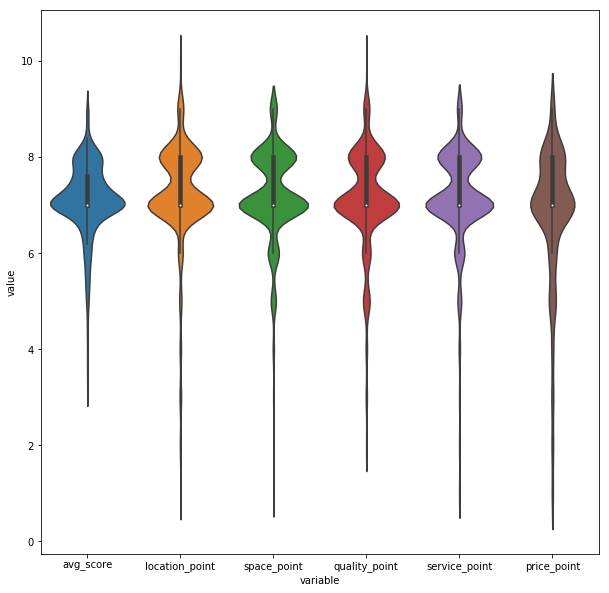

In [16]:
#pinklyhilton_data
user_describe('pinklyhilton')

---------------------------------------------------------
-----------------------violinplot------------------------
---------------------------------------------------------


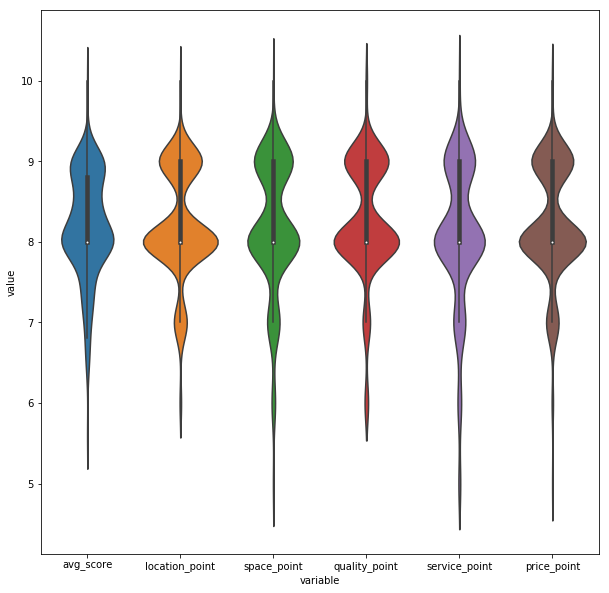

In [17]:
#lydinh1188
user_describe('lydinh1188')

---------------------------------------------------------
-----------------------violinplot------------------------
---------------------------------------------------------


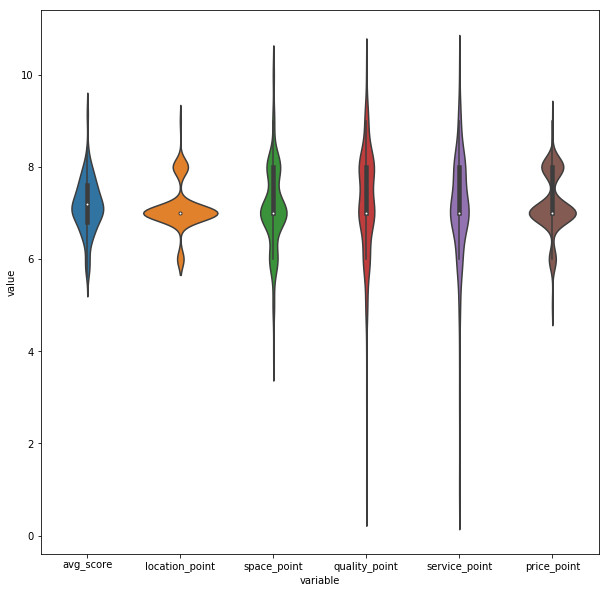

In [18]:
#foodee_fufxb7dd_data
user_describe('foodee_fufxb7dd')

In [19]:
num_reviews[(num_reviews['totalreviews']<209) & (num_reviews['totalreviews']>56)]

,userid,totalreviews
43,Myvan1529,206
44,gacungdinh.20177,203
45,tu.thanh,201
46,hoangminhdang,200
47,June2696,200
48,phuong208nguyen,199
49,nguyenkulan9761,189
50,ngophuongthao1893,189
51,lamdao0708,188
52,phuongthanh8690,187


---------------------------------------------------------
-----------------------violinplot------------------------
---------------------------------------------------------


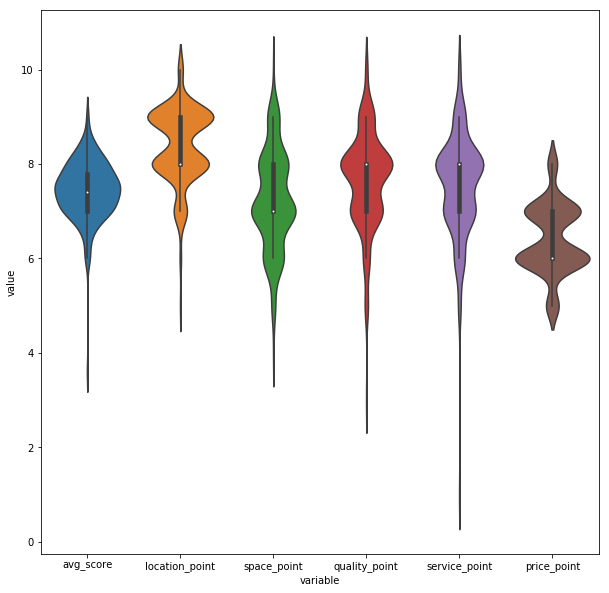

In [20]:
user_describe('Myvan1529')

---------------------------------------------------------
-----------------------violinplot------------------------
---------------------------------------------------------


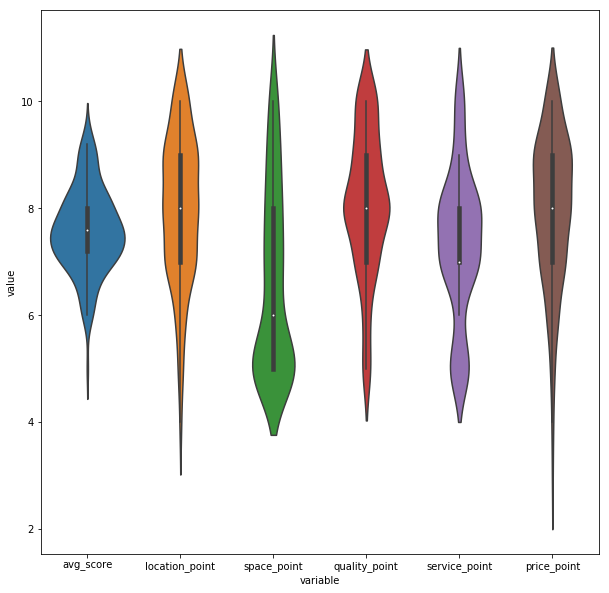

In [21]:
user_describe('duongkhiem')

---------------------------------------------------------
-----------------------violinplot------------------------
---------------------------------------------------------


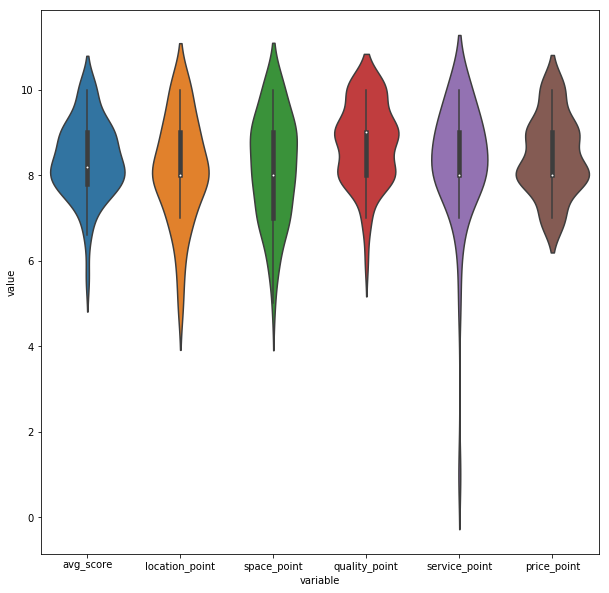

In [22]:
#PeterLong
user_describe('PeterLong')

In [23]:
data_ratings = data[['userid','brandid','location_point','space_point','quality_point','service_point','price_point']]

In [24]:
data_ratings.head()

,userid,brandid,location_point,space_point,quality_point,service_point,price_point
0,taiyo,el-sol-meat-wine-vo-thi-sau,7.0,10,9,9,8.0
1,viola_0309_tv,busan-korean-food-mon-an-han,8.0,8,6,7,8.0
2,tuhao2509,tocotoco-bubble-tea-cong-hoa,7.0,8,7,7,3.0
3,zip_zilip,le-castella-viet-nam-banh-bong-lan-dai-loan,7.0,6,9,6,8.0
4,tien97,tabletop-boardgame-coffee,10.0,10,10,10,10.0


In [29]:
user_ratings_mean = data_ratings.groupby(['userid']).agg('mean').reset_index()
#user_ratings_mean= data_ratings

In [30]:
user_ratings_mean.head()

,userid,location_point,space_point,quality_point,service_point,price_point
0,%40luciango,6.000000,3.000000,8.000000,6.000000,8.000000
1,.....,9.333333,8.000000,9.000000,9.000000,9.333333
2,01202056209,7.333333,7.000000,5.666667,5.000000,5.666667
3,01202193703,7.666667,7.666667,7.666667,6.333333,8.000000
4,01202443444,1.000000,1.000000,1.000000,1.000000,1.000000


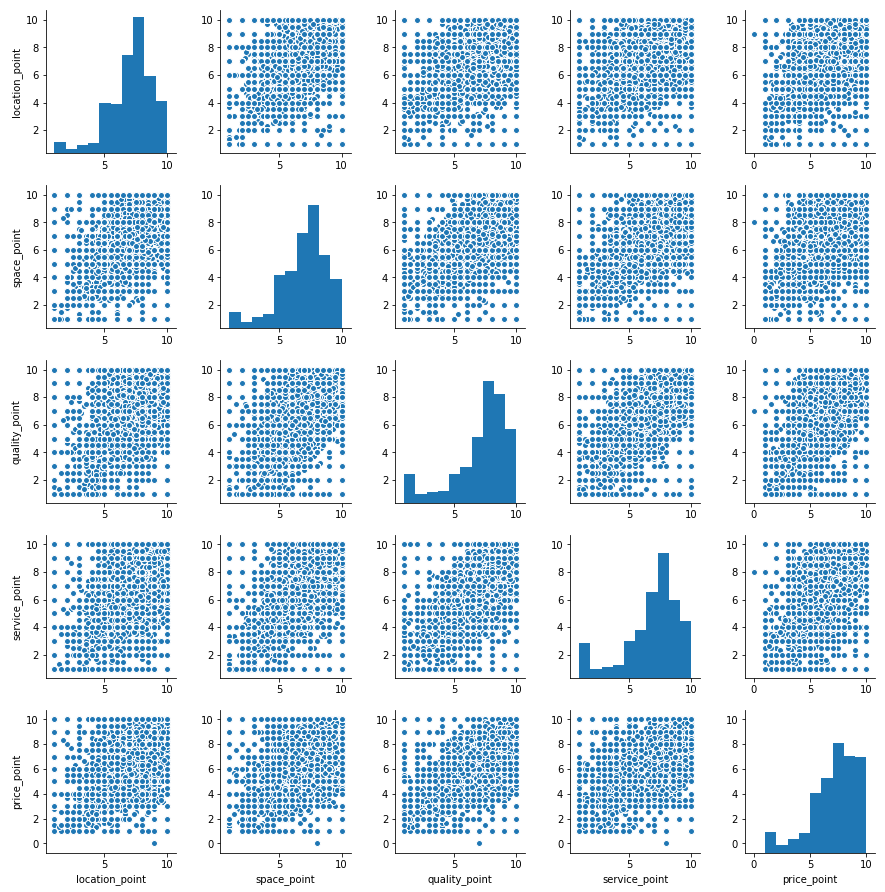

In [31]:
sns.pairplot(user_ratings_mean[['location_point','space_point','quality_point','service_point','price_point']])

---------------------------------------------------------
-----------------------violinplot------------------------
---------------------------------------------------------


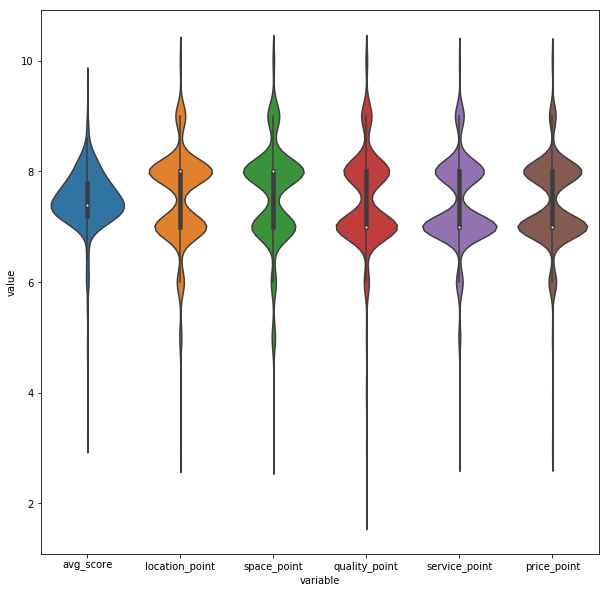

In [35]:
user_describe('giang.nguyen050')

---------------------------------------------------------
-----------------------violinplot------------------------
---------------------------------------------------------


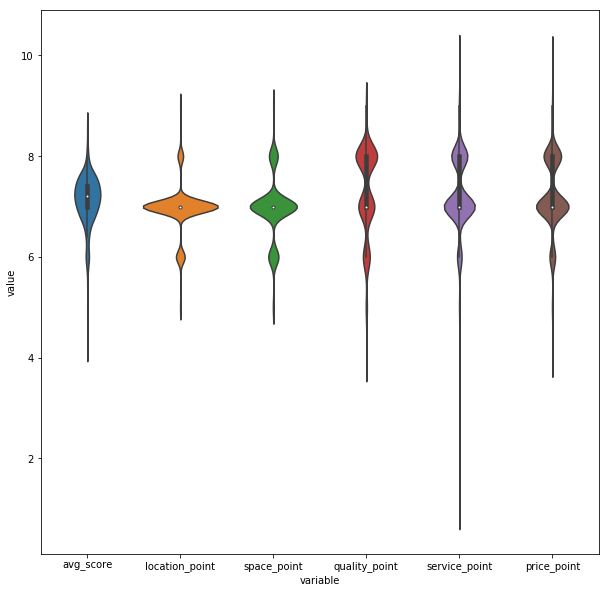

In [36]:
user_describe('d4uch4mh3t_ch0m0tcu0ctjnh')